In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df= pd.read_csv("data_for_classification.csv")
df = df.set_index(["product_name","code"])
df.head()

C:\Users\ohad1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8,19,20,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,,category_name,B1 ויטמין,B6 ויטמין,סיבים תזונתיים,חומצה פולית,אנרגיה,חלבונים,פחמימות,שומנים,נתרן,...,K אשלגן,לחות,כרום,מוליבדן,בלתי רווי,חומצה לאורית,חומצה לינולאית,DHA,EPA,כלורופיל
product_name,code,,,,,,,,,,,,,,,,,,,,,
קלמנטינה,P_964560,פירות,0.09,0.08,1.7,24.0,47.0,9,12,0.2,1.0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0
תפוח עץ מוזהב,P_963136,פירות,0.00,0.00,2.4,0.0,52.0,0.3,13.8,0.2,1.0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0
לימון,P_964492,פירות,0.00,0.08,2.8,0.0,29.0,1.1,9.3,0.3,2.0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0
תפוז ברשת למיץ,P_964348,פירות,0.09,0.06,2.5,39.0,49.0,1,11.9,0.3,0.0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0
אבוקדו,P_964980,פירות,0.07,0.30,6.7,81.0,160.0,2,8.5,14.7,7.0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0


In [3]:
nulls = df.isna().sum()
print(nulls[nulls>0])
df['כלורופיל'] = df.fillna(value =0)

כלורופיל    3793
dtype: int64


In [4]:
print (df.shape)
df.info()

(9581, 98)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9581 entries, ('קלמנטינה', 'P_964560') to ('אבקה חלבון גו טעם שוקולד', 'P_7290110327606')
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   category_name                   9581 non-null   object 
 1   B1 ויטמין                       9581 non-null   float64
 2   B6 ויטמין                       9581 non-null   float64
 3   סיבים תזונתיים                  9581 non-null   float64
 4   חומצה פולית                     9581 non-null   float64
 5   אנרגיה                          9581 non-null   object 
 6   חלבונים                         9581 non-null   object 
 7   פחמימות                         9581 non-null   object 
 8   שומנים                          9581 non-null   object 
 9   נתרן                            9581 non-null   float64
 10  B3 ויטמין                       9581 non-null   float64
 11  אשלגן             

In [5]:
#convert all the dataset to numeric, fill all the nulls with 0, and deletes columns filled only zeros
cols= df.columns[1:]
for col in cols:  
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.fillna(0)
df = df.loc[:, (df != 0).any(axis=0)]
df.shape

(9581, 92)

In [6]:
#in order to reduce background noise, drop the columns in which there are less than 10 products with this feature
df = df.reset_index()
arr = np.array([])
col_droped = np.array([])
cols= df.columns[1:]
for col in cols:
    if df[col].astype(bool).sum(axis=0)<50: #all the features that less than precent of the products have
        arr = np.append(arr, df[col].to_numpy().nonzero())
        col_droped = np.append(col_droped, col)
print("the number of the removed productes is ", len(arr))
arr = set(arr) #all number of rows without duplicates
for i in arr:
    df = df.drop(i, axis=0)
df = df.loc[:, (df != 0).any(axis=0)] #deletes all columns with all values set to zero
df = df.set_index(['product_name','code'])
df.shape

the number of the removed productes is  928


(9257, 41)

In [7]:
x = df.drop('category_name',axis=1)
y = df['category_name']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,   random_state=42)

print (x_train.shape, x_test.shape)

(7405, 40) (1852, 40)


In [27]:
train_set = pd.concat([y_train,x_train], axis = 1)

בישול אפיה ושימורים      1500
חטיפים                   1449
חלב וביצים               1046
מזון מקורר                960
מוצרים לבישול ואפיה       277
לנמנעים מגלוטן            248
בישול                     221
לחם                       192
מוצרי מקרר וביצים         179
מן המקפיא                 178
בריאות במקרר              173
ללא גלוטן                 159
דגנים                     117
ויטמינים ותוספי תזונה     110
דיאט וללא סוכר            101
לתינוק- מזון               92
מאפים ועוגות מהמאפיה       85
ירקות                      82
ללא תוספת סוכר             63
פיצוחים ופירות יבשים       61
תינוקות וילדים             29
לחמים                      26
פירות וירקות אורגני        18
חיסול מלאי                 14
פירות                      11
בשר בקר וכבש                5
דגים                        4
מוצרי עוף והודו             4
ניקיון הבית וחד פעמי        1
Name: category_name, dtype: int64


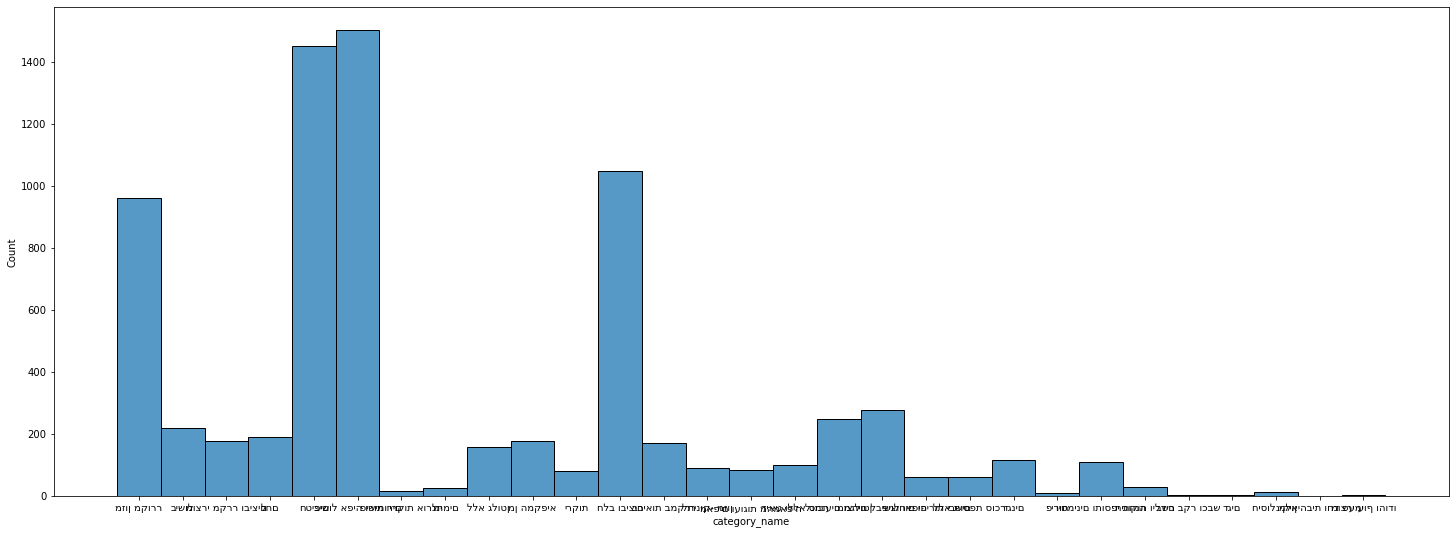

In [39]:
print (train_set['category_name'].value_counts())
plt.figure(figsize=(25,9))
sns.histplot(train_set[['category_name']], x = "category_name")
plt.title("")
plt.show()

In [42]:
scaler = StandardScaler()

products_arr_train = scaler.fit_transform(x_train) #scaler returns numpy array
scaled_products = pd.DataFrame(products_arr_train, index=x_train.index, columns=x_train.columns)

products_arr_test = scaler.transform(x_test)

scaled_products

,,B1 ויטמין,B6 ויטמין,סיבים תזונתיים,חומצה פולית,אנרגיה,חלבונים,פחמימות,שומנים,נתרן,B3 ויטמין,...,לקטוז,D ויטמין,קפאין,B12 ויטמין,שומן ללא טרנס,חומצות שומן רווי,סוכרוז,ביוטין,יוד,סלניום
product_name,code,,,,,,,,,,,,,,,,,,,,,
טורטליני פטריות,P_3989553,-0.03174,-0.313755,-0.022909,-0.558994,-0.456409,-0.569255,-0.479063,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
מיקס אורז אפונה ועדשים,P_7290017325316,-0.03174,2.124248,-0.022909,1.424370,-0.307650,1.891705,-0.342691,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
סחוג ירוק,P_7296073396918,-0.03174,-0.313755,-0.022909,-0.558994,-0.456409,-0.569255,-0.479063,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
אונלי מעדן תות,P_7290112348944,-0.03174,-0.313755,-0.004705,-0.558994,0.394824,-0.469655,0.344850,-0.131758,-0.165505,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
לחם שיפון קל,P_7290013027535,-0.03174,-0.313755,-0.022909,-0.558994,-0.456409,-0.569255,-0.479063,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
בונבוניירה פררו רושה,P_8000500037874,-0.03174,-0.313755,-0.022909,-0.558994,-0.456409,-0.569255,-0.479063,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
קוואקר אנגלי,P_2842002,-0.03174,-0.313755,-0.022909,-0.558994,-0.456409,-0.569255,-0.479063,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
ביצי הפתעה LOL,P_7296073388531,-0.03174,-0.313755,-0.022909,-0.558994,-0.456409,-0.569255,-0.479063,-0.133256,-0.198470,-0.09447,...,-0.051053,-0.059349,-0.036012,-0.032349,-0.030307,-0.074182,-0.013115,-0.020513,-0.045161,-0.016747
